In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Mount your drive
# Run this cell, then you’ll see a link, click on that link, allow access
# Copy the code that pops up, Paste it in the box, Hit enter

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Loading the dataset
diabetes_data = pd.read_csv('/content/gdrive/My Drive/project/recipes.csv',encoding='ISO-8859-1')

#Print the first 5 rows of the dataframe.
#diabetes_data.head()

In [ ]:
## observing the shape of the data
diabetes_data.shape
diabetes_data.dropna(axis=1, how='all')
diabetes_data.dropna(axis=0, how='all')

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients,calories,total_fat,sugars,sodium,protein,stated_fat,total_carbonhydrate
0,apple cider reduction,521756,155,171084,2015/4/19,"['time-to-make', 'course', 'preparation', 'low...","[14.4, 0.0, 0.0, 8.0, 0.0, 0.0, 1.0]",13,"['in 6-8 quart stock pan , measure out 2 cups ...",i saw a post about this on facebook and gave i...,['apple cider'],1,14.4,0,0,8,0,0,1
1,baked corn on the cob,434212,35,542159,2010/8/4,"['60-minutes-or-less', 'time-to-make', 'main-i...","[113.3, 2.0, 21.0, 0.0, 8.0, 1.0, 8.0]",2,"['in an oven heated at 350 f , cook corn in hu...",one of my neighbors was telling me this is her...,['corn'],1,113.3,2,21,0,8,1,8
2,chocolate dirt,425260,5,730126,2010/5/13,"['15-minutes-or-less', 'time-to-make', 'course...","[201.2, 19.0, 91.0, 0.0, 3.0, 37.0, 8.0]",3,"['place chips in a coffee grinder', 'grind unt...","this chocolate ""dirt"" is perfect for dusting c...",['dark chocolate chips'],1,201.2,19,91,0,3,37,8
3,clotted cream,9043,900,6258,2001/5/19,"['weeknight', 'time-to-make', 'cuisine', 'prep...","[410.6, 67.0, 0.0, 1.0, 4.0, 137.0, 1.0]",6,['cook cream in top of double boiler over simm...,this recipe comes close to the real thing.,['heavy cream'],1,410.6,67,0,1,4,137,1
4,easter hard boiled eggs,354371,12,1119236,2009/2/6,"['15-minutes-or-less', 'time-to-make', 'course...","[68.9, 7.0, 0.0, 2.0, 12.0, 7.0, 0.0]",9,['place the eggs in a pot with enough cold sal...,"a gruszecki tradition and now ours, is that ea...",['egg'],1,68.9,7,0,2,12,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,lemon sauteed scallops,177718,15,199848,2006/7/15,"['15-minutes-or-less', 'time-to-make', 'course...","[289.3, 24.0, 2.0, 15.0, 57.0, 46.0, 1.0]",5,"['in a large skillet , melt butter', 'add the ...",dry (no water added) sea scallops are best for...,"['butter', 'garlic cloves', 'sea scallops', 'l...",8,289.3,24,2,15,57,46,1
99995,lemon scones,173856,30,182010,2006/6/20,"['30-minutes-or-less', 'time-to-make', 'course...","[265.0, 21.0, 22.0, 8.0, 7.0, 43.0, 10.0]",10,"['preheat oven to 375 f', 'place all dry ingre...","a great canadian recipe, these pair perfectly ...","['all-purpose flour', 'sugar', 'baking powder'...",8,265.0,21,22,8,7,43,10
99996,lemon semolina cookies,54670,40,52381,2003/2/23,"['60-minutes-or-less', 'time-to-make', 'course...","[191.9, 10.0, 60.0, 3.0, 5.0, 19.0, 10.0]",17,"['using a grater , grate lemon peels , removin...",a very nice cookie,"['lemons', 'unsalted butter', 'vanilla extract...",8,191.9,10,60,3,5,19,10
99997,lemon shrimp with pasta and basil,247455,40,253974,2007/8/19,"['60-minutes-or-less', 'time-to-make', 'course...","[393.7, 15.0, 6.0, 37.0, 58.0, 25.0, 14.0]",6,['cook pasta in a large pan of boiling water f...,this takes no time at all to prepare.it looks ...,"['linguine', 'cooked shrimp', 'unsalted butter...",8,393.7,15,6,37,58,25,14


In [ ]:
X = diabetes_data.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = diabetes_data.calories


In [ ]:
#X.head()

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=1)
print(X_train)

       minutes  n_steps  ...  stated_fat  total_carbonhydrate
50734       40       11  ...         309                    2
31589       55       10  ...           2                    8
43690       25        3  ...          33                    0
69075       40       13  ...           7                    7
33902       20        6  ...          25                    4
...        ...      ...  ...         ...                  ...
50057       25        7  ...           3                    3
98047       12       10  ...         156                   71
5192         5        1  ...           0                    0
77708       15        7  ...          35                    2
98539       35        6  ...          84                    3

[66666 rows x 10 columns]


In [ ]:
print(X)

       minutes  n_steps  ...  stated_fat  total_carbonhydrate
0          155       13  ...           0                    1
1           35        2  ...           1                    8
2            5        3  ...          37                    8
3          900        6  ...         137                    1
4           12        9  ...           7                    0
...        ...      ...  ...         ...                  ...
99994       15        5  ...          46                    1
99995       30       10  ...          43                   10
99996       40       17  ...          19                   10
99997       40        6  ...          25                   14
99998      255       12  ...         401                  142

[99999 rows x 10 columns]


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',random_state=0)
dt.fit(X_train, y_train.astype('int'))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train.astype('int'))))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test.astype('int'))))

Accuracy on training set: 1.000
Accuracy on test set: 0.962


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [ ]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=18, max_features=8, random_state=0)
dt.fit(X_train, y_train.astype('int'))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train.astype('int'))))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test.astype('int'))))

Accuracy on training set: 1.000
Accuracy on test set: 0.894


In [ ]:
y_pred = dt.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test.astype('int'), y_pred))  
print(classification_report(y_test.astype('int'), y_pred)) 

[[49  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        47
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00        24
           7       1.00      1.00      1.00        30
           8       1.00      1.00      1.00        30
           9       1.00      1.00      1.00        28
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        31
          13       1.00      1.00      1.00        29
          14       1.00      1.00

In [ ]:
#DT visualizatin method 1

from sklearn.tree import export_graphviz

dotfile = open("dt2.dot", 'w')

export_graphviz(dt, out_file=dotfile,feature_names = X.columns,class_names=['0','1'])
dotfile.close()
# Copying the contents of the created file ('dt2.dot' ) to a graphviz rendering agent at http://webgraphviz.com/
# check out https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html

IndexError: ignored

In [ ]:
#DT visualizatin method 2
# need to install Graphviz first https://graphviz.gitlab.io/_pages/Download/Download_windows.html
from sklearn.tree import export_graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

export_graphviz(dt, out_file='tree.dot', feature_names=X.columns,class_names=['0','1'])
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')


IndexError: ignored

In [ ]:
#DT visualizatin method 3
#!conda install -y pydotplus
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

IndexError: ignored

In [ ]:
#Plot ROC chart for DT.Write your code below.

In [ ]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'),  y_pred_proba.astype('int'))
auc = metrics.roc_auc_score(y_test.astype('int'), y_pred_proba)

plt.title('ROC chart for DT')
plt.plot(fpr,tpr,label="dt, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

ValueError: ignored

In [ ]:
#Adjust the decision tree parameters to improve the performance.Write your code below.

# add class_weight as balanced so that training accuracy is close to testing accuracy
# reference:uses the value of y to automatically adapt to the weight, 
# and is inversely proportional to the frequency of the class in the input data

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=16,random_state=0)
dt.fit(X_train, y_train.astype('int'))
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train.astype('int'))))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test.astype('int'))))
y_pred = dt.predict(X_test)

Accuracy on training set: 1.000
Accuracy on test set: 0.963


In [ ]:
y_pred_proba = dt.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test.astype('int'),  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.title('ROC chart for DT')
plt.plot(fpr,tpr,label="dt, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

TypeError: ignored

In [13]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.utils.multiclass import type_of_target
print(type_of_target(y_test))

continuous


In [ ]:
#find out the feature importance from the decision tree built above. Write your code below.

#calculate the Gini importance
feat_importance = dt.tree_.compute_feature_importances(normalize=False)
print("feat importance = " + str(feat_importance))

feat importance = [ 0.12925098  0.10061174  0.12212658 10.2513905   0.14168669  0.12641842
  0.16660415  0.14899583  0.24211553  0.15810831]


# NN

In [ ]:

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [10]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=100,verbose=2)  
mlp.fit(X_train, y_train.astype('int'))  

Iteration 1, loss = 7.18512274
Iteration 2, loss = 6.48877455
Iteration 3, loss = 6.27619148
Iteration 4, loss = 6.01726306
Iteration 5, loss = 5.77958228
Iteration 6, loss = 5.58487204
Iteration 7, loss = 5.43047011
Iteration 8, loss = 5.30082638
Iteration 9, loss = 5.18820863
Iteration 10, loss = 5.09344478
Iteration 11, loss = 5.00571364
Iteration 12, loss = 4.93028508
Iteration 13, loss = 4.86247643
Iteration 14, loss = 4.80056564
Iteration 15, loss = 4.74644541
Iteration 16, loss = 4.69538525
Iteration 17, loss = 4.65069965
Iteration 18, loss = 4.61002741
Iteration 19, loss = 4.57018626
Iteration 20, loss = 4.53376917
Iteration 21, loss = 4.49984160
Iteration 22, loss = 4.46898881
Iteration 23, loss = 4.43890879
Iteration 24, loss = 4.41166443
Iteration 25, loss = 4.38411445
Iteration 26, loss = 4.35653916
Iteration 27, loss = 4.33293602
Iteration 28, loss = 4.30765871
Iteration 29, loss = 4.28779707
Iteration 30, loss = 4.26419793
Iteration 31, loss = 4.24342329
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=100,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [14]:
predictions = mlp.predict(X_test).astype('int')  


print("Accuracy", metrics.accuracy_score(y_test.astype('int'), predictions))
print(confusion_matrix(y_test.astype('int'),predictions))  
print(classification_report(y_test.astype('int'),predictions))  

Accuracy 0.08106081060810608
[[ 0 47  0 ...  0  0  0]
 [ 0 38  0 ...  0  0  0]
 [ 0 29  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  1  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.22      0.97      0.36        39
           2       0.00      0.00      0.00        31
           3       0.05      0.04      0.04        47
           4       0.33      0.03      0.06        30
           5       0.33      0.15      0.21        27
           6       0.00      0.00      0.00        24
           7       0.17      0.90      0.29        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        26
          12       0.42      0.16      0.23        31
          13       0.04      0.07      0.05        29
    

In [16]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train.astype('int'))))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test.astype('int'))))

Accuracy on training set: 0.089
Accuracy on test set: 0.081


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

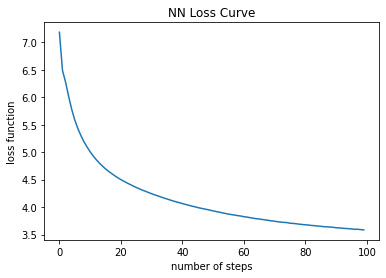

In [18]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [ ]:
#check out weights

In [19]:
(mlp.intercepts_[0]).shape

(10,)

In [20]:
(mlp.coefs_[0]).shape

(10, 10)

In [21]:
mlp.intercepts_[0]

array([ 3.53258829,  0.4137329 ,  1.79927336,  5.6885147 ,  3.27197528,
       -0.50876973,  0.61154344,  1.32547326,  5.40231314,  3.00870377])

In [22]:
mlp.coefs_[0]

array([[-1.90237139e-02,  1.95395683e-02,  1.15197888e-02,
        -2.10970490e-01, -1.55536416e-01,  1.00330271e-01,
        -4.91501954e-03, -1.87429421e-01,  1.25307316e-01,
         3.34804742e-01],
       [-7.37006471e-03,  4.92364498e-02, -1.63838360e-02,
        -2.45421432e-01,  2.30522019e-01,  1.86339117e-02,
        -3.65897538e-04,  3.48669961e-02,  3.10752836e-01,
        -2.89763393e-01],
       [ 1.48994179e-01, -5.46874196e-02,  3.51327885e-02,
        -4.18750822e-01,  1.39470061e-02,  4.35116696e-02,
         2.29179008e-02, -4.35851689e-03,  3.82820568e-01,
         7.03278315e-02],
       [ 8.31182856e+00,  6.58881706e+00, -1.54888468e+01,
        -2.73818401e-01,  8.30850760e+00, -1.28518281e+01,
        -1.43489715e+01, -1.46628903e+01, -2.70093473e+00,
         5.32387161e+00],
       [-2.15350567e-01,  1.25333489e+00,  2.39035378e-01,
        -9.13690343e-01, -2.19810577e-01, -1.35343737e+00,
        -5.08817132e-01, -2.08519888e-02,  2.06697237e-01,
        -1.

In [24]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train.astype('int')) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 7.39352111
Iteration 2, loss = 6.64085305
Iteration 3, loss = 6.51305143
Iteration 4, loss = 6.42125795
Iteration 5, loss = 6.31476290
Iteration 6, loss = 6.18356420
Iteration 7, loss = 6.05067946
Iteration 8, loss = 5.93107002
Iteration 9, loss = 5.82766190
Iteration 10, loss = 5.73423825
Iteration 11, loss = 5.64899934
Iteration 12, loss = 5.56789578
Iteration 13, loss = 5.49122192
Iteration 14, loss = 5.41985873
Iteration 15, loss = 5.35239642
Iteration 16, loss = 5.29121729
Iteration 17, loss = 5.23309992
Iteration 18, loss = 5.17938565
Iteration 19, loss = 5.13145607
Iteration 20, loss = 5.08713516
Iteration 21, loss = 5.04483103
Iteration 22, loss = 5.00857995
Iteration 23, loss = 4.97283333
Iteration 24, loss = 4.94021142
Iteration 25, loss = 4.91146861
Iteration 26, loss = 4.88125816
Iteration 27, loss = 4.85525011
Iteration 28, loss = 4.82985455
Iteration 29, loss = 4.80658679
Iteration 30, loss = 4.78226163
Iteration 31, loss = 4.76285425
Iteration 32, los

In [25]:
print("Accuracy", metrics.accuracy_score(y_test.astype('int'), predictions))
print(confusion_matrix(y_test.astype('int'),predictions))  
print(classification_report(y_test.astype('int'),predictions))

Accuracy 0.12582125821258214
[[49  0  0 ...  0  0  0]
 [25 14  0 ...  0  0  0]
 [ 0  8 15 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        49
           1       0.64      0.36      0.46        39
           2       0.88      0.48      0.62        31
           3       0.70      0.40      0.51        47
           4       0.48      1.00      0.65        30
           5       0.42      0.78      0.55        27
           6       0.00      0.00      0.00        24
           7       0.46      0.77      0.57        30
           8       0.00      0.00      0.00        30
           9       0.00      0.00      0.00        28
          10       0.00      0.00      0.00        34
          11       0.15      1.00      0.26        26
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        29
    

# SVM

In [26]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 1
C1, C2 = 1, 10
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

  


In [27]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 





In [28]:

svm_clfs = []
for gamma, C in hyperparams:
    svm_clf=SVC(kernel="rbf",gamma=gamma, C=C) 
    svm_clf.fit(X_train,y_train.astype('int'))
    svm_clfs.append(svm_clf)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix  
for i, svm_clf in enumerate(svm_clfs):
    predictions = svm_clf.predict(X_test)  
    gamma, C = hyperparams[i]
    print("r=", gamma, "C=", C)
    print("Accuracy=", metrics.accuracy_score(y_test, predictions))
    print(confusion_matrix(y_test,predictions))  
    print(classification_report(y_test,predictions))  

# deployment 

In [ ]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(mlp, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

pred = loaded_model.predict(X_test)
print(pred)


0.71484375
[0 0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1
 0 0 1 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0]


In [ ]:
#score the model on a scoring data set

#diabetes_score_data = pd.read_csv('.....csv')

#sc_X = StandardScaler()
#X =  sc_X.fit_transform(.\diabetes.csv)

#pred = loaded_model.predict(X)
#print(pred)



# Additional code for your reference: 
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html